# Logistic Regression Model

### 1. Load libraries

In [25]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

### 2. Split train-test datasets

In [26]:
df_train = pd.read_csv("source/train.csv")
df_test = pd.read_csv("source/test.csv")
df_total = pd.concat([df_train, df_test])


y_train = df_train.Activity
x_train = df_train.drop(['subject', 'Activity'], axis=1)

y_test = df_test.Activity
x_test = df_test.drop(['subject', 'Activity'], axis=1)


print('X_train : ', x_train.shape)
print('y_train : ', y_train.shape)
print('X_test : ', x_test.shape)
print('y_test : ', y_test.shape)

X_train :  (7352, 561)
y_train :  (7352,)
X_test :  (2947, 561)
y_test :  (2947,)


### 3. Build Logistic Regression before Hyperparameter Tuning

In [27]:
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
accuracy = accuracy_score(y_test,y_pred)*100
confusion_mat = confusion_matrix(y_test,y_pred)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 95.79233118425518
Confusion Matrix
[[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]


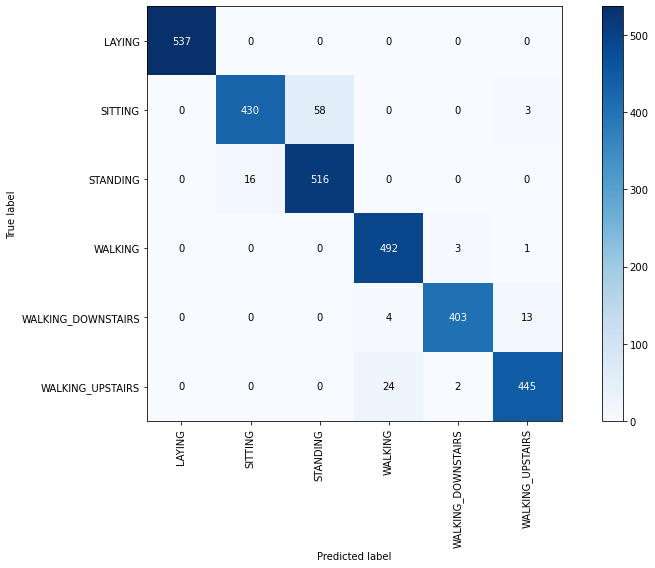

In [29]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.imshow(confusion_mat, cmap=plt.cm.Blues)
ax.figure.colorbar(ax.imshow(confusion_mat, cmap=plt.cm.Blues), ax=ax)
ax.set(
    xticks=np.arange(confusion_mat.shape[1]),
    yticks=np.arange(confusion_mat.shape[0]),
    xticklabels=np.unique(y_pred),
    yticklabels=np.unique(y_pred),
    ylabel="True label",
    xlabel="Predicted label",
)
plt.xticks(rotation = 90)
thresh = confusion_mat.max() / 2.
for i in range(confusion_mat.shape[0]):
        for j in range(confusion_mat.shape[1]):
            ax.text(j, i, int(confusion_mat[i, j]),ha="center", va="center",color="white" if confusion_mat[i, j] > thresh else "black")
fig.tight_layout()